<a href="https://colab.research.google.com/github/Kaush80/machine_learning/blob/main/deeplr/Deep_NN_calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
n_pts = 500 #number of datapoints
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))
#print(y_data.reshape(100,1))

In [5]:
def scatter_plot():
  plt.scatter(X[y==0,0], X[y==0, 1])
  plt.scatter(X[y==1,0], X[y==1, 1])

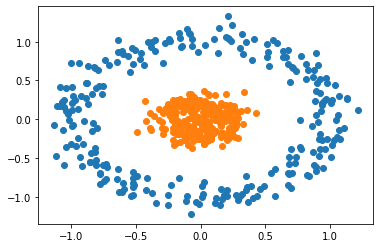

In [6]:
scatter_plot()

In [14]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self,x):
    pred = self.forward(x)
    if pred>=0.5:
      return 1 
    else:
      return 0

In [15]:
torch.manual_seed(2)
model=Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [16]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [17]:
epochs = 1000
losses=[]
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:{} loss:{}".format(i,loss.item()))
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:0 loss:0.7148520350456238
epoch:1 loss:0.6947316527366638
epoch:2 loss:0.6955162286758423
epoch:3 loss:0.7014890313148499
epoch:4 loss:0.7013982534408569
epoch:5 loss:0.697470486164093
epoch:6 loss:0.693925678730011
epoch:7 loss:0.6928598284721375
epoch:8 loss:0.6939383149147034
epoch:9 loss:0.6954388618469238
epoch:10 loss:0.6958757042884827
epoch:11 loss:0.6949177384376526
epoch:12 loss:0.6931492686271667
epoch:13 loss:0.6913899183273315
epoch:14 loss:0.6901613473892212
epoch:15 loss:0.6894590258598328
epoch:16 loss:0.688843309879303
epoch:17 loss:0.6877669095993042
epoch:18 loss:0.6859007477760315
epoch:19 loss:0.6832481622695923
epoch:20 loss:0.6800420880317688
epoch:21 loss:0.6765591502189636
epoch:22 loss:0.6729681491851807
epoch:23 loss:0.6692698001861572
epoch:24 loss:0.6653285622596741
epoch:25 loss:0.6609662771224976
epoch:26 loss:0.6560585498809814
epoch:27 loss:0.6505835056304932
epoch:28 loss:0.6446025967597961
epoch:29 loss:0.63819819688797
epoch:30 loss:0.631407141

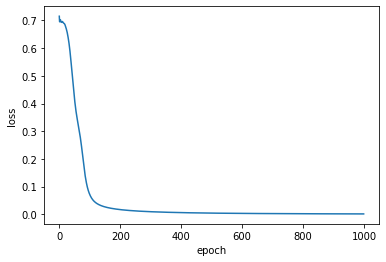

In [18]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

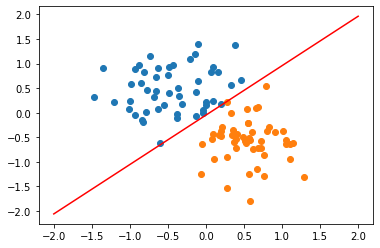

In [ ]:
plot_fit("trained model")

red point positive probability = 0.6281726956367493
black point positive probability = 0.4659110903739929
red point in class = 1
black point in class= 0


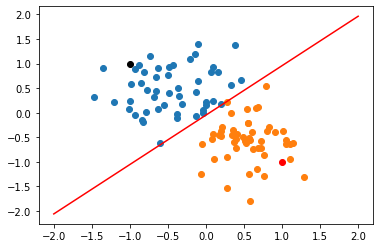

In [ ]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0,1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1],'ko')
print("red point positive probability = {}".format(model.forward(point1).item()))
print("black point positive probability = {}".format(model.forward(point2).item()))
print("red point in class = {}".format(model.predict(point1)))
print("black point in class= {}".format(model.predict(point2)))
plot_fit("trained model")